#### The difference between green taxi trip and yellow trip
The biggest difference between yellow and green cabs in New York City is the starting point of the ride. Yellow cabs have no restrictions when it comes to travel. They’re allowed to pick up passengers anywhere in the city, while green cabs don’t share the same luxury. Essentially, green cabs can only pick up passengers in Harlem (south of West 110th St and East 96th St), Queens, the Bronx and Brooklyn — excluding the airports. The green taxis can drop passengers off anywhere in New York City (all five boroughs)⁵.

Is there anything else you would like to know?

Source: Conversation with Bing, 5/22/2023(1) What’s With the Green Taxis in NYC? - New York Simply. https://newyorksimply.com/green-taxis-nyc-cab/ Accessed 5/22/2023.
(2) The Differences Between Sustainable Tourism and Ecotourism - TripSavvy. https://www.tripsavvy.com/sustainable-tourism-ecotourism-differences-5185311 Accessed 5/22/2023.
(3) The Differences Between Green Tourism, Ecotourism and ... - Culture Trip. https://theculturetrip.com/usa/articles/what-is-the-difference-between-green-eco-and-sustainable-tourism/ Accessed 5/22/2023.
(4) What is green travel and how can you travel sustainably? - Worldpackers. https://www.worldpackers.com/articles/green-travel Accessed 5/22/2023.
(5) What’s the Difference Between Green Cabs, Yellow Cabs & Other Taxis in .... https://www.citysignal.com/whats-the-difference-between-green-cabs-yellow-cabs-other-taxis-in-nyc/ Accessed 5/22/2023.
(6) The Green Cab of New York: the Boro Taxi - New York City Travel Tips. https://www.new-york-city-travel-tips.com/green-cab-new-york-boro-taxi/ Accessed 5/22/2023.
(7) xiey1/nyc_taxi_2015: NYC green and yellow trips in year 2015 EDA - GitHub. https://github.com/xiey1/nyc_taxi_2015 Accessed 5/22/2023.

Get the data.

In [ ]:
import requests
import os

yellow_trip_jan2022_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet"
yellow_trip_feb2022_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet"

yellow_trip_jan2022_file = requests.get(yellow_trip_jan2022_url)

# get the current working directory
cwd = os.getcwd()

# specify the path to save the file
path = os.path.join(cwd, "yellow_tripdata_2022-01.parquet")

# save the file
open(path, 'wb').write(yellow_trip_jan2022_file.content)

In [ ]:
yellow_trip_feb2022_file = requests.get(yellow_trip_feb2022_url)
path = os.path.join(cwd, "yellow_tripdata_2022-02.parquet")
open(path, 'wb').write(yellow_trip_feb2022_file.content)

Load data into pandas dataframe.

In [1]:
import pandas as pd

In [2]:
df_yellow_trip_202201 = pd.read_parquet("yellow_tripdata_2022-01.parquet")

In [3]:
df_yellow_trip_202201.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [4]:
df_yellow_trip_202201.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


### How many columns are there?

In [5]:
len(df_yellow_trip_202201.columns)

19

In [6]:
df_yellow_trip_202201.loc[:, 'duration'] = df_yellow_trip_202201['tpep_dropoff_datetime'] - df_yellow_trip_202201['tpep_pickup_datetime']

In [7]:
df_yellow_trip_202201.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,0 days 00:17:49
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,0 days 00:08:24
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,0 days 00:08:58
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,0 days 00:10:02
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,0 days 00:37:32


In [8]:
df_yellow_trip_202201['duration'].describe()

count                      2463931
mean     0 days 00:14:12.732175129
std      0 days 00:46:26.718308266
min              -3 days +14:37:36
25%                0 days 00:06:19
50%                0 days 00:10:11
75%                0 days 00:16:10
max                5 days 21:53:11
Name: duration, dtype: object

In [9]:
df_yellow_trip_202201.loc[:, 'duration'] = df_yellow_trip_202201['duration'].apply(lambda dt: (dt.total_seconds()/60)) 

In [10]:
df_yellow_trip_202201['duration'].describe(percentiles=[0.95, 0.98, 0.99])

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
50%      1.018333e+01
95%      3.193333e+01
98%      4.215000e+01
99%      5.085000e+01
max      8.513183e+03
Name: duration, dtype: float64

### What's the standard deviation of the trips duration in January?

In [11]:
df_yellow_trip_202201['duration'].describe(percentiles=[0.95, 0.98, 0.99]).loc['std']

46.44530513776802

### What fraction of the records left after you dropped the outliers?

In [12]:
df_yellow_trip_202201['duration'].between(1, 60).mean()

0.9827547930522406

In [13]:
df = df_yellow_trip_202201[df_yellow_trip_202201['duration'].between(1, 60)]

In [14]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [15]:
categorical = [
    'PULocationID',
    'DOLocationID'
]

In [16]:
df[categorical] = df[categorical].astype('str')

C:\Users\094079\AppData\Local\Temp\ipykernel_12672\790595652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype('str')


In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
dv = DictVectorizer()

In [19]:
independent_features = df[categorical].to_dict(orient='records')

In [38]:
X_train = dv.fit_transform(independent_features)

In [39]:
X_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

### What's the dimensionality of this matrix (number of columns)?

In [22]:
len(dv.feature_names_)

515

In [23]:
target = 'duration'
y_train = df[target].values

In [24]:
len(y_train)

2421440

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_train)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

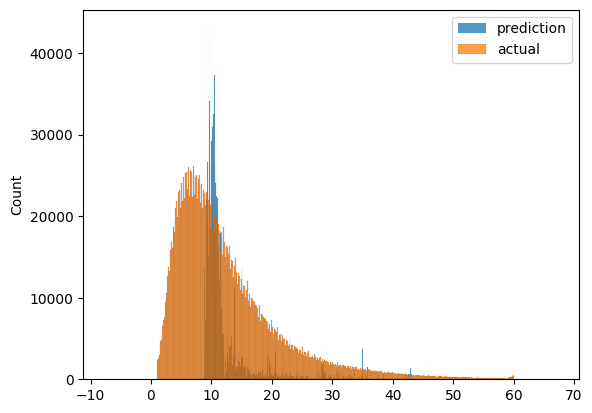

In [29]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

### What's the RMSE on train?

In [30]:
mean_squared_error(y_true=y_train, y_pred=y_pred, squared=False) # RMSE

6.986190833327483

In [31]:
df_yellow_trip_202202 = pd.read_parquet("yellow_tripdata_2022-02.parquet")

In [32]:
df_yellow_trip_202202.loc[:, 'duration'] = df_yellow_trip_202202['tpep_dropoff_datetime'] - df_yellow_trip_202202['tpep_pickup_datetime']
df_yellow_trip_202202.loc[:, 'duration'] = df_yellow_trip_202202['duration'].apply(lambda dt: (dt.total_seconds()/60)) 
df2 = df_yellow_trip_202202[df_yellow_trip_202202['duration'].between(1, 60)]
df2[categorical] = df2[categorical].astype('str')

C:\Users\094079\AppData\Local\Temp\ipykernel_12672\2877721618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[categorical] = df2[categorical].astype('str')


In [40]:
dv2 =  DictVectorizer()
independent_features2 = df2[categorical].to_dict(orient='records')
X_test = dv.transform(independent_features2)
y_test = df2[target].values

In [41]:
y_pred = lr.predict(X_test)

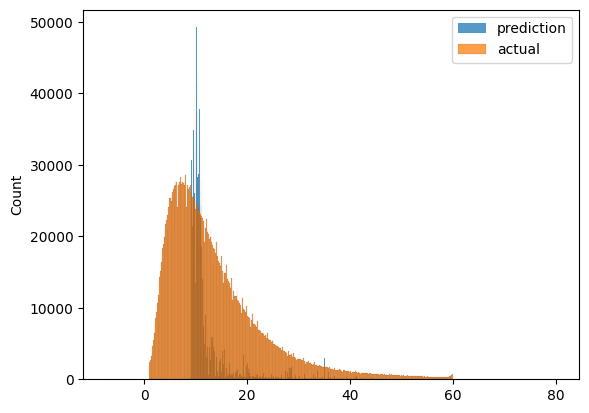

In [42]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_test, label='actual')

plt.legend()

### What's the RMSE on validation?

In [43]:
mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

7.786408816421503